# Classification

A notebook to implement a pretty simple model to learn about Binary Classification (using Logistic Regression)

## Generate Data

Here, we will generate a data with a known function, i.e., we will simulate data. The new term for this is _Generative AI_ :). The advantage is, we exactly know the model. So, we will know if our understanding is correct.

Simulation is a very powerful technique when we are developing new theory or implementing a known theory. The ground truth is known, so we check our understanding, can debug if things do not go as expected.

Here, we will consider the following model.

$$

z = -1 + 2x_1 + \epsilon \\
x_1 \sim U(-1,1) \\
\epsilon \sim N(0,\sigma^2)
$$

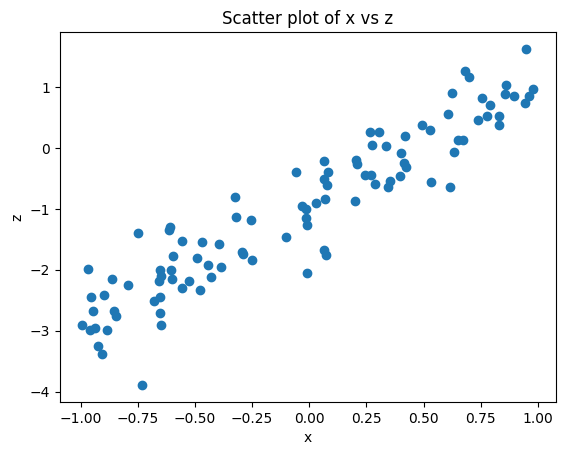

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(x, z)
plt.xlabel('x')
plt.ylabel('z')
plt.title('Scatter plot of x vs z')
plt.show()

Ok, but we want to something like 0 and 1 as class labels.
The simplest way to do that would be to threshold it, and now we are we have  dataset to try out a classification model.

$$
y = 1 \text{ iff } z > 0 \\
= 0 \text{  o.w }
$$

In [7]:
y = np.heaviside(x, 0)

Let us check the data, and mark the "y" labels what sort of data we have generated!

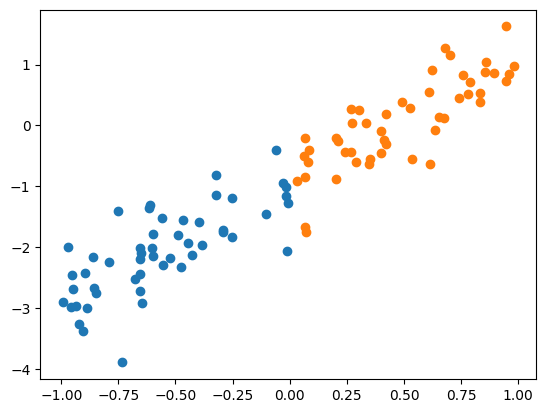

In [12]:
ind = y==0
x1 = x[ind]
z1 = z[ind]
x2 = x[~ind]
z2 = z[~ind]

plt.scatter(x1, z1, color='tab:blue')
plt.scatter(x2, z2, color='tab:orange')
plt.show()



## Fit/ Train:  Let us fit model using sklearn's APIs

In [16]:
from sklearn.linear_model import LogisticRegression

# Reshape x to be a 2D array with one column
X = np.reshape(x, (n, 1))

# Fit the linear regression model
reg = LogisticRegression()
reg.fit(X, y)

LogisticRegression()

In [20]:
print('coefss', reg.coef_)
print('intercept', reg.intercept_)
print('score', reg.score(X,y))

coefss [[4.1267325]]
intercept [0.11342342]
score 0.96


## Diagnosis
Asses the model fit and observe how the errors are!

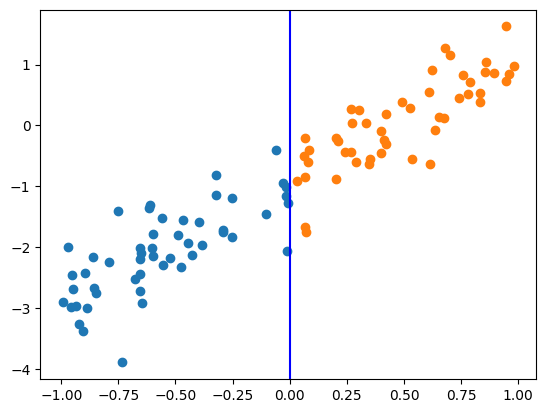

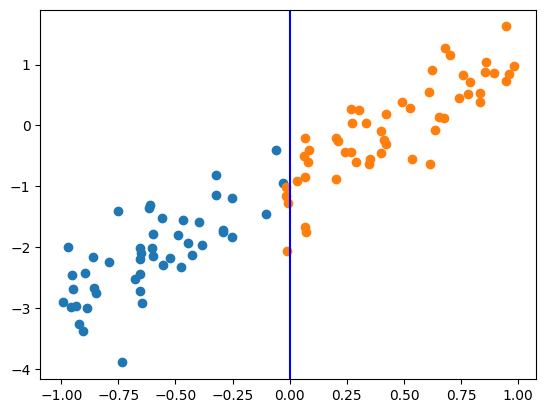

In [38]:
yh_b0 = reg.predict(X)

plt.axvline(x = 0, color = 'b', label = 'true decision boundary in z')
plt.scatter(x1, z1, color='tab:blue')
plt.scatter(x2, z2, color='tab:orange')
plt.show()

indh = (yh_b0==0)
plt.axvline(x = 0, color = 'b', label = 'true decision boundary in z')
plt.scatter(x[indh], z[indh], color='tab:blue')
plt.scatter(x[~indh], z[~indh], color='tab:orange')
plt.show()

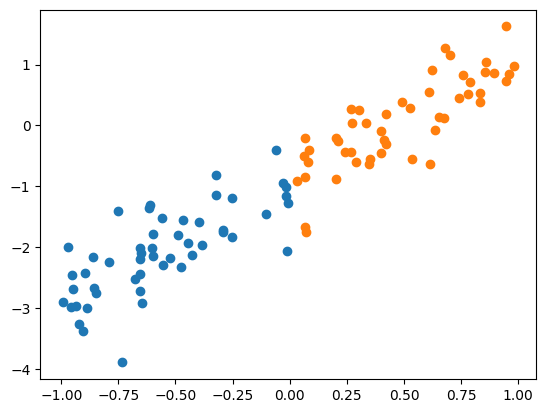

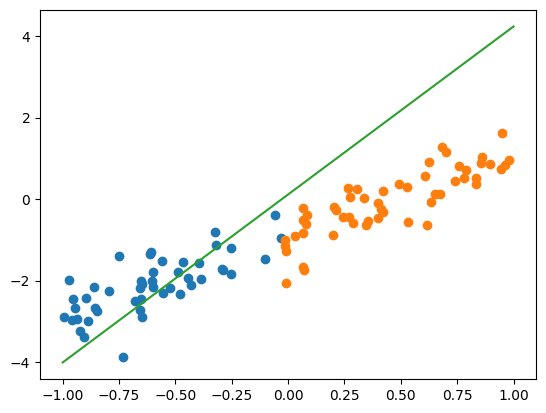

In [ ]:
# lets plot the decision boundary on "x", not on "z"

yh = reg.predict(X)

plt.scatter(x1, z1, color='tab:blue')
plt.scatter(x2, z2, color='tab:orange')
plt.show()

indh = (yh==0)

plt.scatter(x[indh], z[indh], color='tab:blue')
plt.scatter(x[~indh], z[~indh], color='tab:orange')

xb = np.linspace(-1, 1, 100).reshape(100,1)
yb = reg.intercept_ + reg.coef_*xb
plt.plot(xb, yb, label='boundary', color='tab:green')
plt.show()


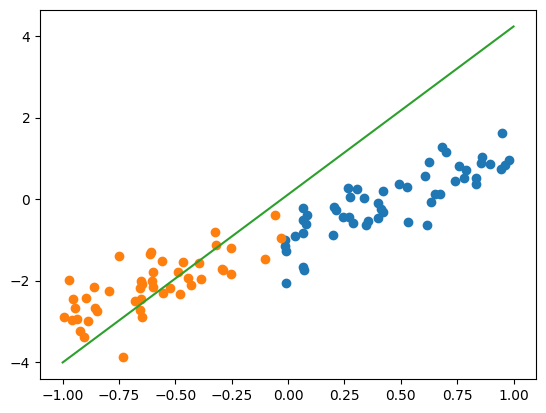

In [ ]:
# Let us plot the class probabilties

yp = reg.predict_proba(X)
indh = (yp[:,1]>0.5)


plt.scatter(x[indh], z[indh], color='tab:blue')
plt.scatter(x[~indh], z[~indh], color='tab:orange')



In [34]:
yp

array([[0.27222714, 0.72777286],
       [0.71686327, 0.28313673],
       [0.91335452, 0.08664548],
       [0.86498077, 0.13501923],
       [0.9730896 , 0.0269104 ],
       [0.97404326, 0.02595674],
       [0.91395075, 0.08604925],
       [0.48673681, 0.51326319],
       [0.40473306, 0.59526694],
       [0.02179099, 0.97820901],
       [0.13979241, 0.86020759],
       [0.27764519, 0.72235481],
       [0.81381752, 0.18618248],
       [0.97579222, 0.02420778],
       [0.89922738, 0.10077262],
       [0.92883908, 0.07116092],
       [0.9770862 , 0.0229138 ],
       [0.06353167, 0.93646833],
       [0.95922596, 0.04077404],
       [0.92834928, 0.07165072],
       [0.97998596, 0.02001404],
       [0.18293237, 0.81706763],
       [0.06586515, 0.93413485],
       [0.22454885, 0.77545115],
       [0.96839287, 0.03160713],
       [0.82122048, 0.17877952],
       [0.13568795, 0.86431205],
       [0.71734324, 0.28265676],
       [0.14646983, 0.85353017],
       [0.02551402, 0.97448598],
       [0.

## Evaluation
Report the model metrics

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Confusion Matrix')
print(confusion_matrix(y, yh))

print('Classification Report')
print(classification_report(y, yh))


Confusion Matrix
[[47  4]
 [ 0 49]]
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        51
         1.0       0.92      1.00      0.96        49

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



Note: 

We did not create train and test splits.
Since it was a simulation, if we split create a test split, the model behavior will change much.
In other words, the train and test will have identical distributions by design, with very high probability. 

However, when solving real world problems, where we are not sure about the data generative process, the hold out methods is essentials to test the generalization ability of the model , beyond the training data.

## Questions

1. Is the Logistic Regression decision boundary correct? 
2. Is the Logistic Regression a faithful for this simulated data? What could you have done?